In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("../data/cleaned/cleaned_dataset.csv")

X = df.drop("pha", axis=1)
X = X.select_dtypes(include=[np.number])
y = df["pha"]

print("Final feature count:", X.shape[1])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(importance.head(10))



Final feature count: 23
       feature  importance
1            H    0.419071
17        moid    0.178135
18     moid_ld    0.107171
6            q    0.051027
4            e    0.039465
7            i    0.034353
0          neo    0.022247
22   epoch_day    0.015176
20  epoch_year    0.012233
5            a    0.012083


In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9999


In [39]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    191282
         1.0       0.99      0.98      0.98       423

    accuracy                           1.00    191705
   macro avg       1.00      0.99      0.99    191705
weighted avg       1.00      1.00      1.00    191705



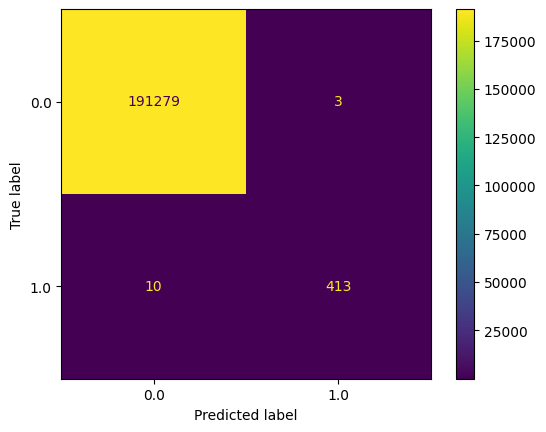

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (766819, 35)
X_test shape: (191705, 35)
y_train shape: (766819,)
y_test shape: (191705,)


In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(X_test)[:,1])


0.9999947597574983

In [22]:
type(X_train)



numpy.ndarray

In [27]:
import pandas as pd
df = pd.read_csv("../data/cleaned/cleaned_dataset.csv")


In [28]:
X = df.drop("pha", axis=1)
y = df["pha"]


In [31]:
print("Model expects:", len(model.feature_importances_))
print("Cleaned dataset has:", len(X.columns))


Model expects: 35
Cleaned dataset has: 24


In [32]:
X_train.shape


(766819, 35)

In [33]:
df = pd.read_csv("../data/cleaned/cleaned_dataset.csv")
print(len(df.columns) - 1)  # minus target column
print(X_train.shape[1])


24
35
